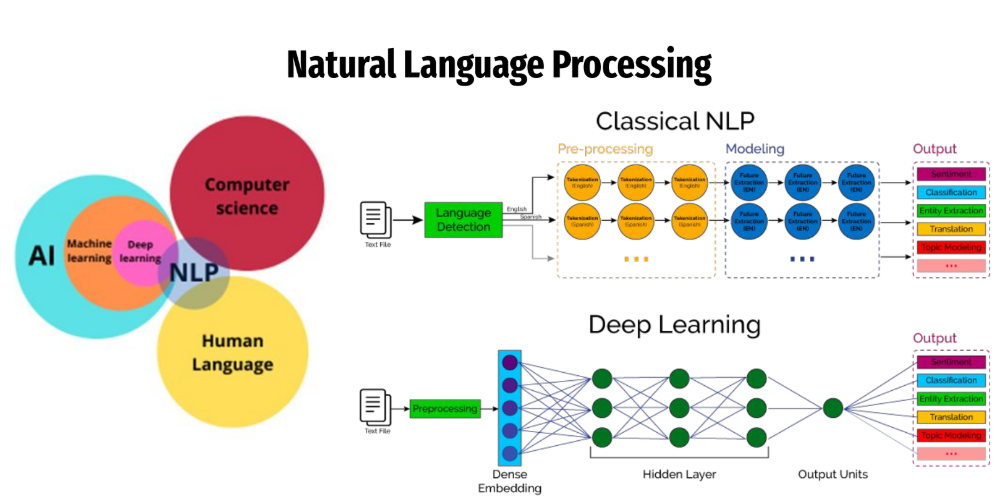

# Bag of word

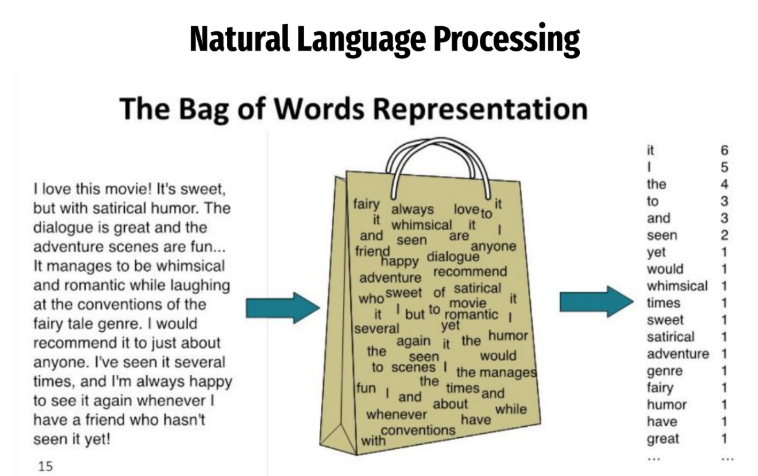

# Bag of word
- trả về tần suất xuất hiện của các từ và k biết thứ tự giữa các từ
- corpus :  tập hợp của các document
- bước 1 - make vocabulary: xây dựng 1 danh sách các từ đã xuất hiện trong document của bạn (nó chỉ tính 1 lần xuất hiện thôi)
- bước 2 : , tạo 1 mảng 2 chiều chứa số phần tử là vocabulary , vocabulary ở trên sẽ đc sắp xếp theo bảng chữ cái , nó sẽ xét với 1 1 document trong corpus - sẽ ghi ra số lần xuất hiện của word trong vocabulary ở document ra

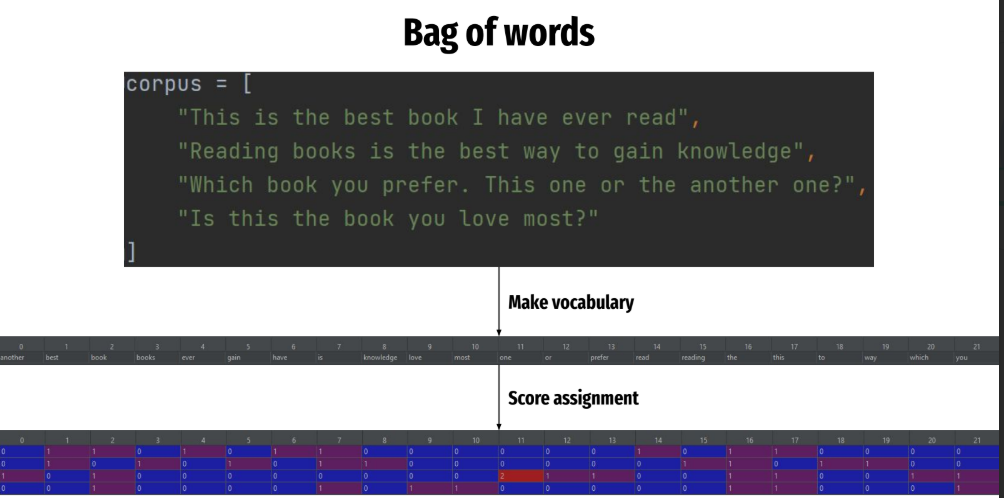

- CountVectorizer trong scikit-learn có tác dụng chuyển đổi văn bản thành ma trận số, dựa trên tần suất xuất hiện của từng từ trong tập dữ liệu văn bản. Nó được sử dụng phổ biến trong xử lý ngôn ngữ tự nhiên (NLP) để chuẩn bị dữ liệu văn bản cho các mô hình máy học.

- Cách hoạt động của CountVectorizer:
  + Tiền xử lý văn bản:
    + Chuyển đổi tất cả chữ cái thành chữ thường (nếu không tắt lowercase=True).
      Loại bỏ dấu câu (nếu không dùng tham số token_pattern hoặc stop_words).
      Tách câu thành các từ (tokenization).

  + Xây dựng từ điển (vocabulary):
    + Xác định tất cả các từ duy nhất có trong tập văn bản.
    + Ví dụ, với văn bản:  "I love NLP. NLP is fun!"
        từ điển có thể là: ['i', 'love', 'nlp', 'is', 'fun']

  + Mã hóa văn bản thành ma trận số:
    + Đếm số lần xuất hiện của từng từ trong từng câu.
      Văn bản: ["I love NLP", "NLP is fun"]
      [[1, 1, 1, 0, 0],   # "I love NLP"
      [0, 0, 1, 1, 1]]   # "NLP is fun"

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Tiền xử lý data dạng Text - Text Preprocessing

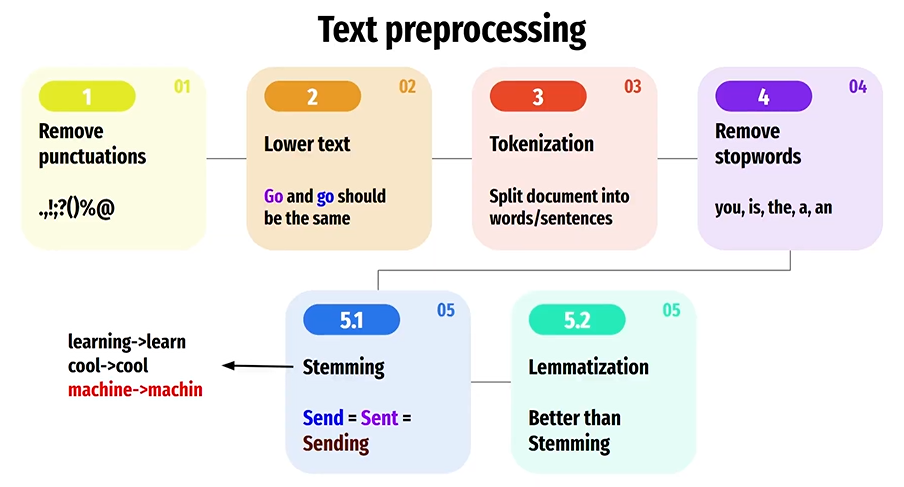

- Step 1 : Remove punctuations : xóa các dấu câu
- Step 2 : Lower text : chuyển hết về chữ thường
- Step 3 : Tokenization : chia dữ liệu thành các đơn vị nhỏ hơn
- Step 4 : Remove stopwords (stopwords là những từ xuất hiện rất nhiều nhưng k mang quá nhiều ý nghĩa)
- Step 5.1 : Stemming
    - (thường thường các từ thường có nhiều biến thể ví dụ : sent - send - sending ) - bạn phải biến nó về cùng 1 từ chung gốc (nhược điểm có thể 1 vài từ learning mới là gốc nhưng nó lại lọc lại là learn)
- Step 5.2 : Lemmatization (nâng cao của stemming) - đảm bảo việc sau khi convert thì các từ sẽ có ý nghĩa hơn

** đối với những ngôn ngữ như tiếng việt bạn có thể bỏ bước 5 vì nó k có biến đổi hình thái từ 1 gốc từ

** chú ý : ở bước 3 - đối với tiếng anh , các từ đều có 1 nghĩa riêng nên dễ chia nhỏ hơn còn như tiếng việt các từ đơn or từ ghép đều có thể mang nghĩa khác nhau

** tùy thuộc vào ngôn ngữ , bạn có  thể bỏ các bước để phù hợp or thay đổi để tùy chỉnh chúng
# Dùng thư  viện NLTK or textbolgs

# Hạn chế của Bag of words
  - dễ bị mất thông tin của các từ do thứ tự của chúng bị thay đổi theo abc



# Cách khắc phục cho Bag of words  : dùng N-grams
- N-grams là một phương pháp trích xuất đặc trưng từ văn bản, trong đó thay vì xem xét từng từ đơn lẻ (unigram), ta có thể lấy các cụm từ liên tiếp có kích thước N.

- 🛠 Công thức tổng quát:
N-grams: Là một chuỗi liên tiếp N từ trong một đoạn văn bản.
Nếu văn bản có M từ, thì số lượng N-grams được tạo ra sẽ là:  M−N+1

- Thường chỉ lấy n từ 1 -> 5 : ví dụ 1 từ quá dài chỉ xuất hiện 1 lần nó chẳng có ý nghĩa gì cả


# Tần xuất xuất hiện của các từ
  - k phải 1 từ xuất hiện nhiều lần hay ít lần nó đều tồi (nó k có cái nhìn toàn cảnh để bạn có thể đánh giá đọ qtrong của nó)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "This is the best book I have ever read",
    "Reading books is the best way to gain knowledge",
    "Which book you prefer. This one or the another one?",
    "Is this the book you love most?"
]

vectorize = CountVectorizer(ngram_range=(1,2), stop_words="english")
# ngram_range(1,2)
  # xử dụng n_grams với
  # Unigram (1-gram) → Xử lý từng từ đơn lẻ.
  # Bigram (2-grams) → Xử lý từng cụm từ liên tiếp gồm 2 từ.

# stop_words = "emglish"  : Loại bỏ các từ dừng (stop words) tiếng Anh trước khi tạo vector. (bước 4)


data = vectorize.fit_transform(corpus)
# fit_transform(corpus) thực hiện hai bước:
# Tạo từ điển (vocabulary) bằng cách xác định tất cả các từ duy nhất có trong corpus.
# Chuyển đổi văn bản thành ma trận đếm số lần xuất hiện của từng từ trong mỗi câu

vocabulary = vectorize.get_feature_names_out()  # trả về danh sách tất cả các từ duy nhất xuất hiện trong corpus theo thứ tự từ điển.
print("Vocabulary : ")
print(vocabulary)
result = data.toarray()  #chuyển đổi ma trận thưa thành mảng NumPy để dễ dàng quan sát dữ liệu.
print("Bag of word : ")
print(result)

CountVectorizer(ngram_range=(1, 2), stop_words='english')
